In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width: 50% !important; height: 50% !important;} </style>"
HTML(style)


In [3]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
titanic_data = pd.read_csv("/Users/admin/Downloads/titanic/train.csv")


In [5]:
!pip install jupyter-tabnine


In [6]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name','Ticket', 'Cabin'], axis=1)

In [12]:
X = pd.get_dummies(X)

In [9]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [13]:
X = X.fillna({'Age': X.Age.median()})

In [14]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [15]:
Y = titanic_data.Survived

In [13]:

Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [14]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [15]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [16]:
clf.fit(X, Y)

DecisionTreeClassifier(criterion='entropy')

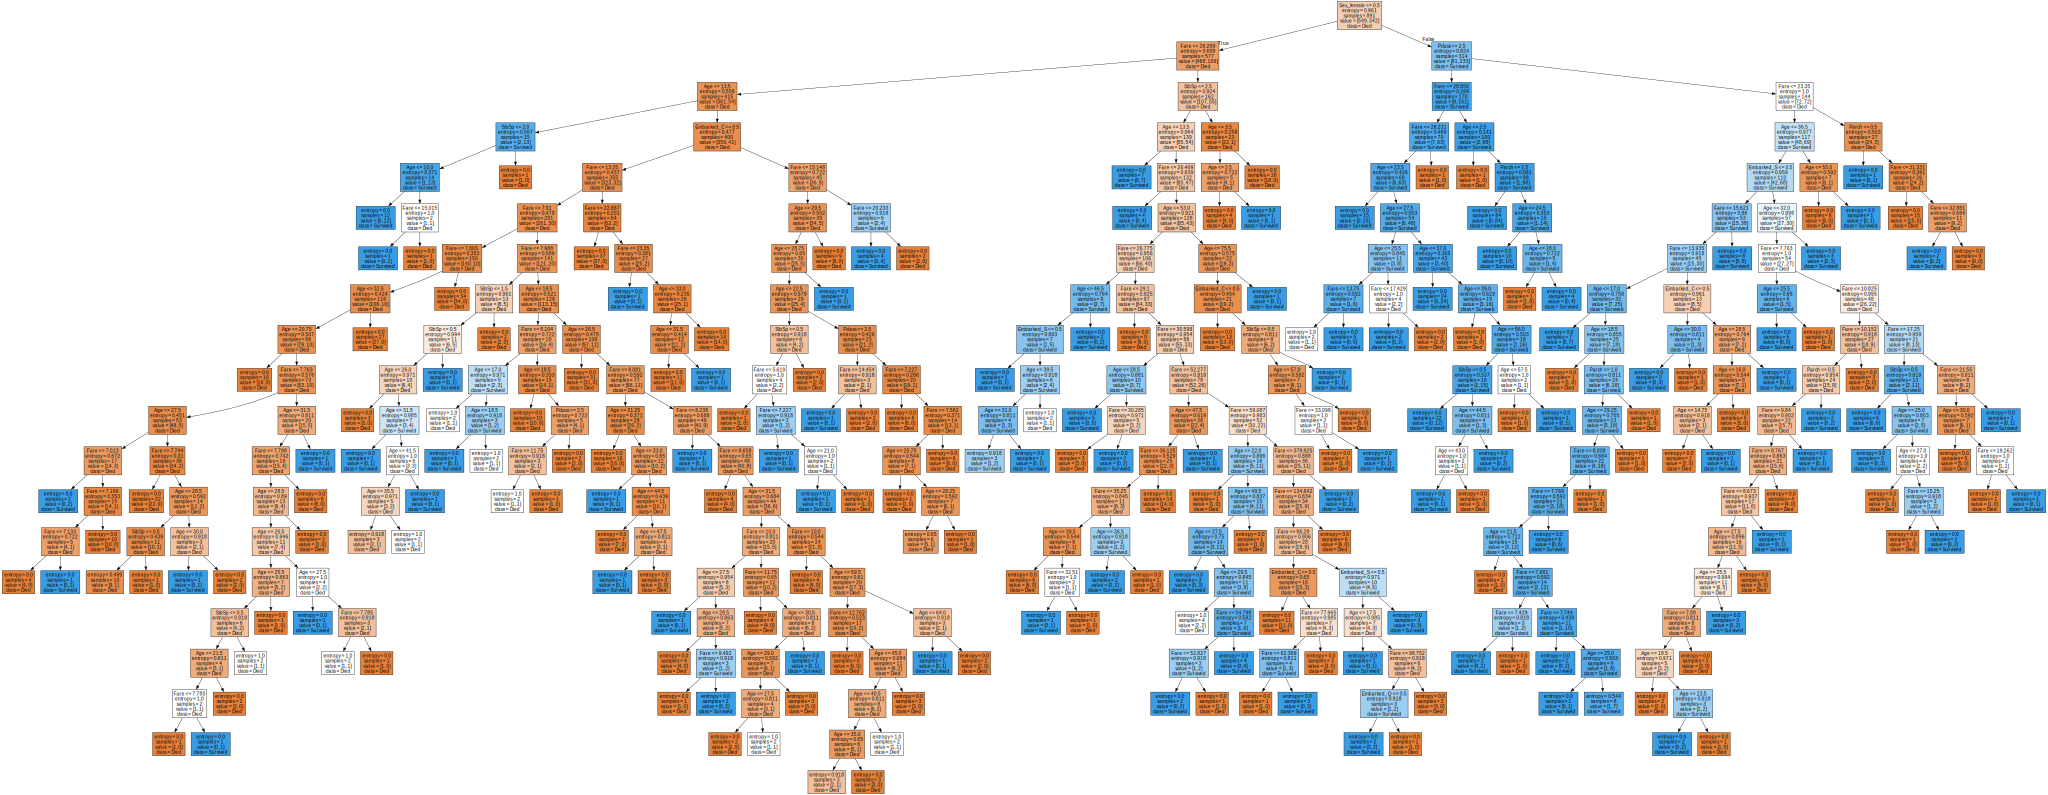

In [17]:
graph = Source(tree.export_graphviz(clf, out_file=None
    , feature_names=list(X)
    , class_names=['Died', 'Survived'], filled=True))

display(SVG(graph.pipe(format='svg')))

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [19]:
clf = tree.DecisionTreeClassifier()

In [20]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
clf.score(X_train, y_train)

0.9798657718120806

In [22]:
max_depth_values = range(1, 100)

In [23]:
scores_data = pd.DataFrame()

In [24]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

/var/folders/y6/0v8f_ns90nnct7qv3jxpbx9r0000gn/T/ipykernel_26343/3074222126.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
/var/folders/y6/0v8f_ns90nnct7qv3jxpbx9r0000gn/T/ipykernel_26343/3074222126.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
/var/folders/y6/0v8f_ns90nnct7qv3jxpbx9r0000gn/T/ipykernel_26343/3074222126.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
/var/folders/y6/0v8f_ns90nnct7qv3jxpbx9r0000gn/T/ipykernel_26343/3074222126.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

In [25]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169


In [26]:
scores_data = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                      var_name='set_type', value_name='score')

In [27]:
scores_data.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<Axes: xlabel='max_depth', ylabel='score'>

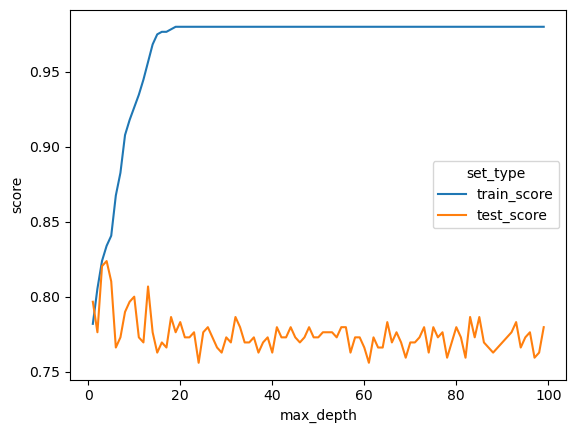

In [28]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data)

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.model_selection import GridSearchCV

In [4]:
clf_rf = RandomForestClassifier()

In [5]:
parametrs = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}

In [9]:
grid_search = GridSearchCV(clf_rf, parametrs, cv = 5)

In [29]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [30]:
grid_search.score(X_train, y_train)

0.8540268456375839

In [31]:
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [32]:
best_clf = grid_search.best_estimator_

In [33]:
best_clf.score(X_test, y_test)

0.8

In [34]:
feature_importances = best_clf.feature_importances_

In [37]:
feature_importances = pd.DataFrame({'feature': list(X_train),
                               'feature_importances': feature_importances})

In [39]:
feature_importances.sort_values('feature_importances', ascending=False)

,feature,feature_importances
6,Sex_male,0.259790
5,Sex_female,0.249508
0,Pclass,0.144743
1,Age,0.137215
4,Fare,0.106994
3,Parch,0.035850
9,Embarked_S,0.026143
2,SibSp,0.019314
7,Embarked_C,0.011508
8,Embarked_Q,0.008934
